Total unique Categories are 33 


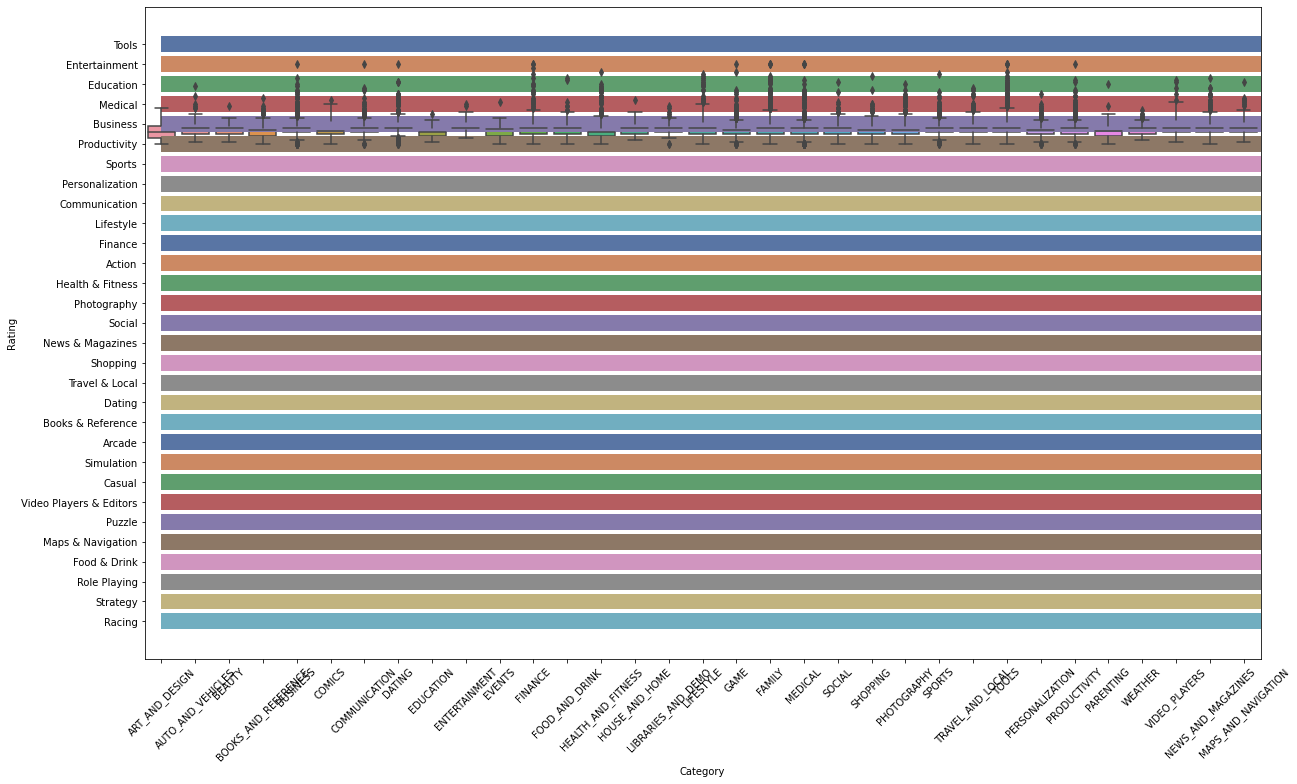

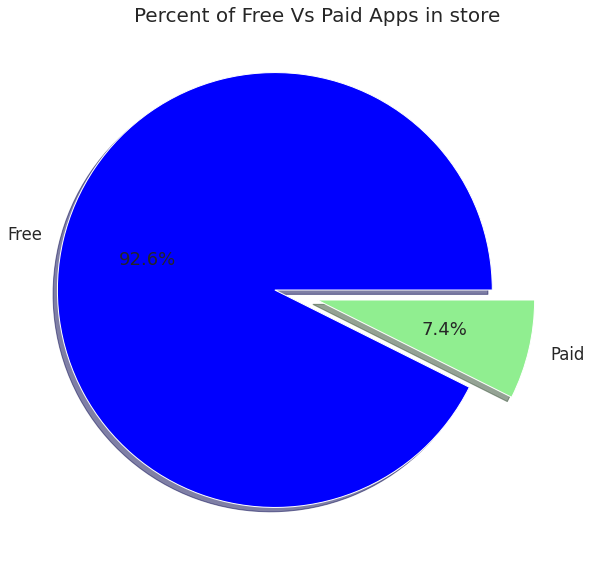

There are 10357 total rows.
4571 Apps are Popular!
5786 Apps are Unpopular!

For an 80-20 training/test split, we need about 2071.4 apps for testing

Predicted:  [1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0]
Accuracy Percentage:  0.8902027027027027
[[759   7]
 [188 822]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



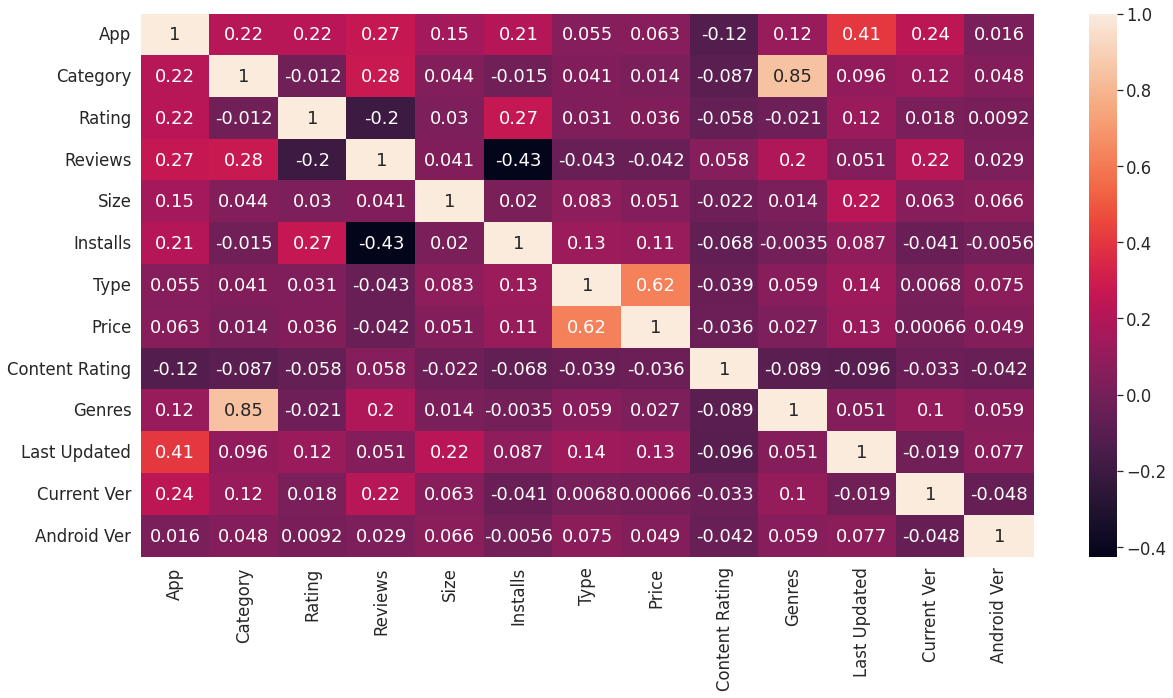

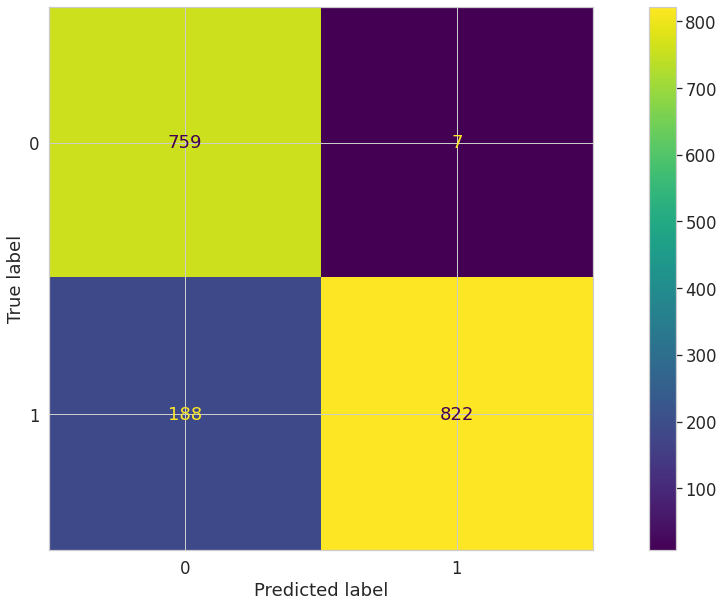

XGBoost Classifier Test Accuracy: 0.9481981981981982
XGBoost confusion_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



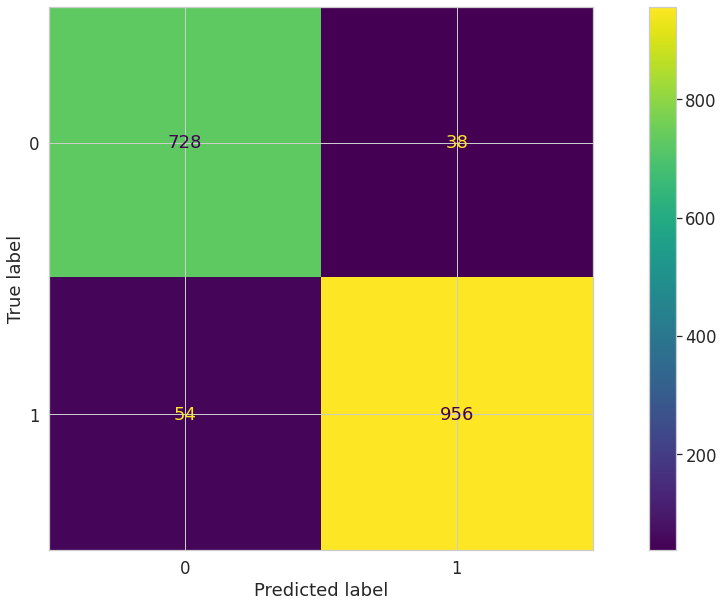

[[728  38]
 [ 54 956]]
KNeighborsClassifier Test Accuracy: 0.8941441441441441
[[713  53]
 [135 875]]
Logistic Regression Predicted:  [1 1 0 1 0 0 0 1 1 0]
Logistic Regression Actual:  [1 1 0 1 0 0 0 1 1 0]
Logistic Regression Accuracy Percentage:  0.8918918918918919
k-MEAN
[[-0.13575945 -0.16931281 -0.16776413 -0.15813783 -0.06481157]
 [-0.50299945 -0.38254669 -0.15799426 -0.15770431 -0.06481157]
 [ 0.96596057 -0.6085746  -0.06827091 -0.11127099 -0.06481157]
 [ 0.59872056  0.08656785  0.8289626  -0.04252266 -0.06481157]
 [ 0.23148056 -0.86019058 -0.16596966 -0.15770431 -0.06481157]]
X Values is
[[-0.13575945 -0.16931281 -0.16776413 -0.15813783 -0.06481157]
 [-0.50299945 -0.38254669 -0.15799426 -0.15770431 -0.06481157]
 [ 0.96596057 -0.6085746  -0.06827091 -0.11127099 -0.06481157]
 [ 0.59872056  0.08656785  0.8289626  -0.04252266 -0.06481157]
 [ 0.23148056 -0.86019058 -0.16596966 -0.15770431 -0.06481157]]


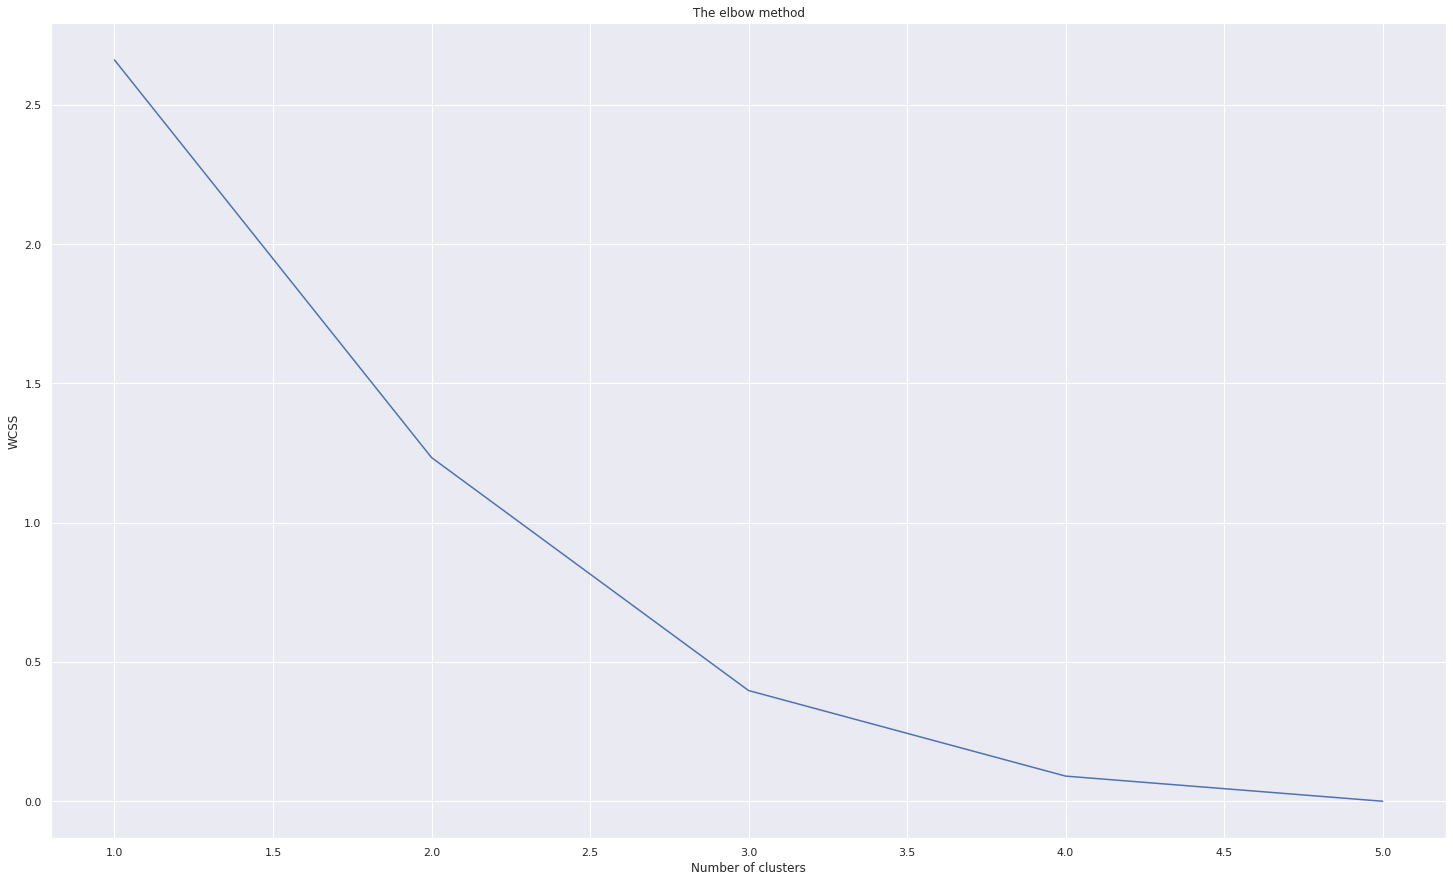

[0 0 1 1 0]
[[-0.13575945 -0.47068336 -0.16390935 -0.15784882 -0.06481157]
 [ 0.78234057 -0.26100338  0.38034585 -0.07689683 -0.06481157]]


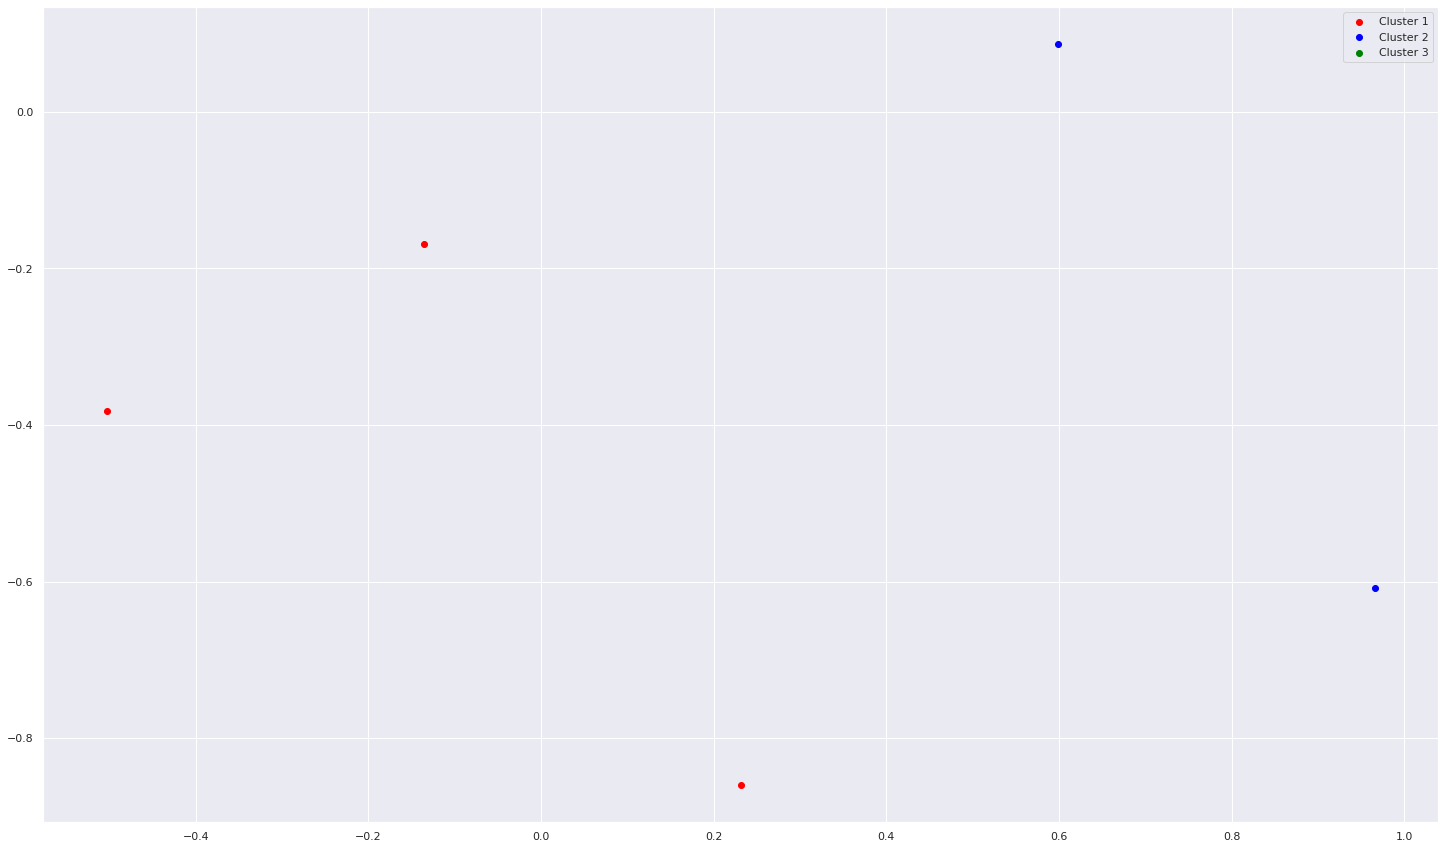

In [ ]:
#mporting the packges/libraries



import pandas as pd 
import numpy as np  
import seaborn as sns 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


#readind the file data using pandas
filePath="https://raw.githubusercontent.com/nawabanjum/mlDatasets/main/googleplaystore.csv";

df=pd.read_csv(filePath)
df.head()
#df.info()

df.isnull().sum()

categories = list(df["Category"].unique())
print("Total unique Categories are {0:.0f} ".format(len(categories)-1))

mislabel = df.loc[df["Category"] == "1.9"]
df = df.drop(int(mislabel.index.values),axis=0)
#print(df["Category"].unique())
#Total number of rating with null values
df['Rating'].isnull().sum()

mean_value=df['Rating'].mean()

df['Rating'].fillna(value=mean_value, inplace=True)
#df = df.drop(df[df['Rating'].isnull()].index, axis=0)

##################Charts Start #########################
# Compare Apps vs Ratings
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Total Apps'),
    title='Histogram of Compare Apps vs Ratings')
data = [go.Histogram(x=df["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')




#Show top 30 app genres
plt.figure(figsize=(20, 12))
genres = df["Genres"].value_counts()[:30]
ax = sns.barplot(x=genres.values, y=genres.index, palette="deep")

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='center')


plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()


df.dtypes
df["Type"] = (df["Type"] == "Paid").astype(int)
corr = df.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

##################Charts End #########################

######################Algorithm start

#Extract App, Installs, & Content Rating from df_apps
popApps = df.copy()
popApps = popApps.drop_duplicates()
#data wrangling Remove characters preventing values from being floats and integers

popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:50,['App','Installs','Content Rating']]


#To predict  sucess of app we will define 1000 as threshold . If installs are greater than threshold,App will be succesful otherwise unsuccesful

popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes


#dropping unncessary data as we see in the correlation these column have no relation and some have negative relation
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)


testDf = testPop1.append(testPop0)
trainDf = popAppsCopy
#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()




model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
predicted = model.predict(X_test)

print("Predicted: ",predicted[:25])
print("Actual:    ",np.array(y_test[:25]))
print("Accuracy Percentage: " ,accuracy_score(y_true = y_test, y_pred = predicted))

cm = confusion_matrix(y_test, predicted)
print(cm)  
plot_confusion_matrix(model, X_test, y_test);
plt.show()
########another XGBClassifier

XGBClassifier_eval_set = [(X_test, y_test)]

model_xgb = xgb.XGBClassifier(n_estimators=500,                          
                          learning_rate=0.05,
                          random_state=42,
                          eval_set=XGBClassifier_eval_set,
                          max_depth=3,
                          eval_metric='merror',
                          early_stopping_rounds=10,
                          verbose=True,
                          n_jobs=-1,gamma=10)



model_xgb.fit(X_train, y_train);
model_xgb_predicted = model_xgb.predict(X_test)
print("XGBoost Classifier Test Accuracy:", model_xgb.score(X_test, y_test))

print("XGBoost confusion_matrix")
plot_confusion_matrix(model_xgb, X_test, y_test);
plt.show()
cm = confusion_matrix(y_test, model_xgb_predicted)
print(cm)  
##############KNeighborsClassifier



classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_test, y_test)
classifier_predicted = classifier.predict(X_test)
print("KNeighborsClassifier Test Accuracy:", classifier.score(X_test, y_test))
cm = confusion_matrix(y_test, classifier_predicted)
print(cm)  

#################Logistic Regression
lg_model = LogisticRegression().fit(X_train,y_train)
lg_predict = lg_model.predict(X_test)

print("Logistic Regression Predicted: ",lg_predict[:10])
print("Logistic Regression Actual: ",np.array(y_test[:10]))
print("Logistic Regression Accuracy Percentage: ",accuracy_score(y_true=y_test,y_pred = lg_predict))


#################### K-MEAN

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from scipy import stats
plt.style.use("ggplot")
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import warnings
warnings.filterwarnings('ignore')

dataf = pd.read_csv(filePath) # read the data

dataf.head()
dataf["Size"] = dataf["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
                              if "Varies with device" in str(x) else x)
dataf["Size"] = dataf["Size"].apply(lambda x: str(x).replace('M','') 
                              if 'M' in str(x) else x)
dataf["Size"] = dataf["Size"].apply(lambda x: str(x).replace(',','') 
                              if ',' in str(x) else x)
dataf['Size'] = dataf['Size'].apply(lambda x: str(x).replace('+', '') 
                              if '+' in str(x) else x)
dataf['Size'] = dataf["Size"].apply(lambda x: float(str(x).replace('k',''))/1024 
                              if 'k' in str(x) else x)





dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Free', 'NaN') if 'Free' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Paid', 'NaN') if 'Paid' in x else x)

print("k-MEAN")
dataf.head()



dataf["Price"] = dataf["Price"].apply(lambda x: str(x).replace('$','') if '$' in x else x)





dataf = dataf.dropna()


dataf['Size'] = dataf['Size'].apply(lambda x:float(x))
dataf['Installs'] = dataf['Installs'].apply(lambda x:int(x))
dataf['Reviews'] = dataf['Reviews'].apply(lambda x:int(x))
dataf['Price'] = dataf['Price'].apply(lambda x:float(x))
dataf = dataf.dropna()

data = dataf[['Rating', 'Size', 'Installs', 'Reviews', 'Price']]
def mean_norm(x):
    x = np.array(x)
    x = (x - np.mean(x))/np.std(x)
    return x





data['Rating'] = mean_norm(data['Rating'])
data['Size'] = mean_norm(data['Size'])
data['Installs'] = mean_norm(data['Installs'])
data['Reviews'] = mean_norm(data['Reviews'])
data['Price'] = mean_norm(data['Price'])
result = data

result


#x = data[0:5]
data = np.array(data)
print(data[0:5])
print("X Values is")

x = data[0:5]
print(x)


#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 6):
    # refer to 
    #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # to check the params of KMeans and the meaning for each one
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

#generated cluster
print(y_kmeans)

print(kmeans.cluster_centers_) #display cluster centers


plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')

plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')

plt.legend()
plt.show()


#*****************Case 2


#*****************Case 2
import re
import sys
import time
import datetime
from sklearn import metrics
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np  
import seaborn as sns 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn import svm
from sklearn.cluster import KMeans


filePath="https://raw.githubusercontent.com/nawabanjum/mlDatasets/main/googleplaystore.csv";

case2_df = pd.read_csv(filePath)
case2_df

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')
case2_df.head()

case2_df.isnull().any()



case2_df['Rating'] = case2_df['Rating'].fillna(case2_df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	case2_df['Current Ver'] = case2_df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	case2_df['Current Ver'] = case2_df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

case2_df['Current Ver'] = case2_df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
case2_df['Current Ver'] = case2_df['Current Ver'].fillna(case2_df['Current Ver'].median())


case2_df['Category'].unique()

# Check record  of unreasonable value which is 1.9
i = case2_df[case2_df['Category'] == '1.9'].index
case2_df.loc[i]
# Drop bad column
case2_df = case2_df.drop(i)
# Removing NaN values
case2_df = case2_df[pd.notnull(case2_df['Last Updated'])]
case2_df = case2_df[pd.notnull(case2_df['Content Rating'])]
# App values encoding
le = preprocessing.LabelEncoder()
case2_df['App'] = le.fit_transform(case2_df['App'])
# This encoder converts the values into numeric values

# Category features encoding
category_list = case2_df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
case2_df = pd.concat([case2_df, pd.get_dummies(case2_df['Category'], prefix='cat')], axis=1)


# In[19]:


# Genres features encoding
le = preprocessing.LabelEncoder()
case2_df['Genres'] = le.fit_transform(case2_df['Genres'])


# In[20]:


# Encode Content Rating features
le = preprocessing.LabelEncoder()
case2_df['Content Rating'] = le.fit_transform(case2_df['Content Rating'])


# In[21]:


# Price cleaning
case2_df['Price'] = case2_df['Price'].apply(lambda x : x.strip('$'))


# In[22]:


# Installs cleaning
case2_df['Installs'] = case2_df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
case2_df["Installs"] = case2_df["Installs"].str.replace("+","") 
case2_df["Installs"] = case2_df["Installs"].str.replace(",","")
case2_df["Installs"] = case2_df["Installs"].astype("int64")

# In[23]:


# Type encoding
case2_df['Type'] = pd.get_dummies(case2_df['Type'])


# In[25]:


# Last Updated encoding
case2_df['Last Updated'] = case2_df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))


# In[26]:


# Convert kbytes to mbytes 
k_indices = case2_df['Size'].loc[case2_df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(case2_df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
case2_df.loc[k_indices,'Size'] = converter


# In[28]:


# Size cleaning
case2_df['Size'] = case2_df['Size'].apply(lambda x: x.strip('M'))
case2_df[case2_df['Size'] == 'Varies with device'] = 0
case2_df['Size'] = case2_df['Size'].astype(float)


# In[30]:


# Split data into training and testing sets
features = ['App', 'Reviews', 'Size',  'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = case2_df[features]
y = case2_df['Installs']


# In[31]:


# Split the dataset into 75% train data and 25% test data.
Case2_X_train, case2_X_test, Case2_y_train, case2_y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)




model_rf = RandomForestClassifier(n_estimators=20,
                                  max_depth=5,
                                  max_samples=0.2,
                                  random_state=42,	
                                  n_jobs=-1)
model_rf.fit(case2_X_test,case2_y_test);

model_skgb = GradientBoostingClassifier(random_state=42,
                                        learning_rate=0.005, 
                                        n_estimators=1600,
                                        max_depth=9,
                                        min_samples_split=1200, 
                                        min_samples_leaf=60, 
                                        subsample=0.85)

model_skgb.fit(case2_X_test,case2_y_test);
###
model_lr = LogisticRegression()
model_lr.fit(case2_X_test,case2_y_test);

# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
#svc.fit(Case2_X_train, Case2_y_train)

# Make the predictions
#y_predict = svc.predict(case2_X_test)
 
# Measure the performance
#print("svc Training Accuraccy", metrics.accuracy_score(case2_y_test, y_predict))


#RandomForestClassifier Training and Validation Accuracy:
print('RandomForestClassifier Training Accuracy:', model_rf.score(Case2_X_train,Case2_y_train).max())
print('RandomForestClassifier Validation Accuracy:', model_rf.score(case2_X_test, case2_y_test).max())
print()

print()
#XGBoost Training and Validation Accuracy:
print('GradientBoostingClassifier  Training Accuracy:', model_skgb.score(Case2_X_train,Case2_y_train))
print('GradientBoostingClassifier  Validation Accuracy:', model_skgb.score(case2_X_test, case2_y_test))
print()
#Logistic Regression Training and Validation Accuracy:
print('LogisticRegression Training Accuracy:',model_lr.score(Case2_X_train,Case2_y_train).max())
print('LogisticRegression Validation Accuracy:', model_lr.score(case2_X_test, case2_y_test).max())



     |████████████████████████████████| 74 kB 1.7 MB/s 
     |████████████████████████████████| 276 kB 18.8 MB/s 
     |████████████████████████████████| 100 kB 7.9 MB/s 
     |████████████████████████████████| 106 kB 28.6 MB/s 
     |████████████████████████████████| 98 kB 5.7 MB/s 
     |████████████████████████████████| 175 kB 37.2 MB/s 
     |████████████████████████████████| 525 kB 45.2 MB/s 
     |████████████████████████████████| 925 kB 35.4 MB/s 
     |████████████████████████████████| 829 kB 46.8 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 180 kB 56.7 MB/s 
     |████████████████████████████████| 131 kB 50.6 MB/s 
     |████████████████████████████████| 8.4 MB 26.7 MB/s 
     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 138 kB 70.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 332 kB 46.4 MB/s 
     |███████████████████